### Correlation Analysis Between Prices and StockTwits Sentiment

The following code prepares stock price data for analysis. It loads the stock price data, adds lagged features to it.

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from utils.StockPricesProcess import load_prices_df, add_lags

# defining the path to the stock prices data and the date range
df_path = "../../data/stock_prices/yfinance/AAPL_prices_2019-01-01_2020-01-01.csv"
start_date_string = "2019-01-01"
end_date_string = "2020-01-01"

# Load stock prices and add lags using functions from StockPricesProcess.py
stock_data = load_prices_df(path=df_path, start_date_string=start_date_string, end_date_string=end_date_string)
stock_data = add_lags(stock_data=stock_data.copy(), numLags=3)
stock_data.head(2)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3
Date,,,,,,,,
2019-01-02 05:00:00+00:00,37.118910,38.067913,36.960742,37.845039,148158800,37.845039,37.845039,37.845039
2019-01-03 05:00:00+00:00,34.504368,34.921355,34.029868,34.075401,365248800,37.845039,37.845039,37.845039


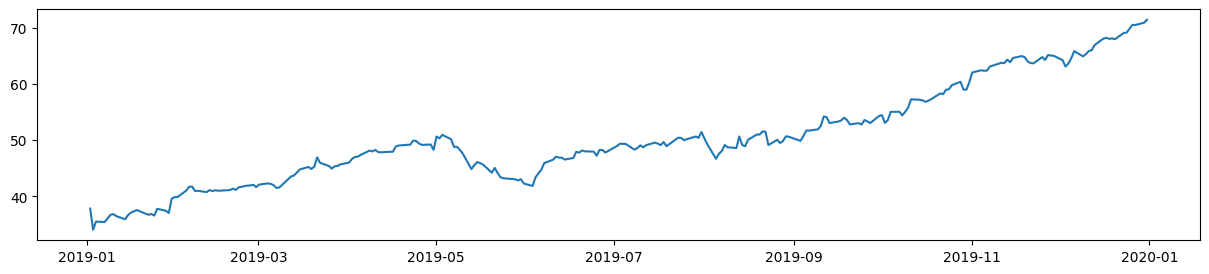

In [7]:
plt.figure(figsize=(15, 3))
plt.plot(stock_data.index, stock_data['Close'],)

This code snippet reads a CSV file containing stock-related messages from StockTwits for the AAPL stock. It converts the 'datetime' column to datetime objects with UTC timezone. Then, it filters the data to include only messages within the specified date range.


In [8]:
# Reading stocktwits data from CSV file into a DataFrame
stock_twits = pd.read_csv("../../data/stocktwits/stocktwits_AAPL.csv")

# Converting the 'datetime' column to datetime objects and assigning to 'Date' column
stock_twits["Date"] = pd.to_datetime(stock_twits["datetime"], utc=True)

# Converting start_date_string and end_date_string to datetime objects
start_date = pd.to_datetime(start_date_string, utc=True)
end_date = pd.to_datetime(end_date_string, utc=True)

# Filtering stock_twits DataFrame to include only rows within the specified date range
stock_twits = stock_twits.loc[(stock_twits["Date"] >= start_date) & (stock_twits["Date"] <= end_date)]

print("Minimum Date:", stock_twits["Date"].min())
print("Maximum Date:", stock_twits["Date"].max())

print("Shape of DataFrame:", stock_twits.shape)


Minimum Date: 2019-01-01 00:08:25+00:00
Maximum Date: 2019-12-31 23:57:46+00:00
Shape of DataFrame: (184583, 6)


preprocesse the text messages from StockTwits data by applying the function preprocess_text() imported from the SentimentAnalysis.py module.


In [9]:
import sys
sys.path.append('../..')
from utils.SentimentAnalysis import preprocess_text

stock_twits["processed_message"] = stock_twits["message"].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Calculate sentiment scores for the processed messages using the function called get_vader_sentiment_score imported from the SentimentAnalysis.py module.


In [10]:
from utils.SentimentAnalysis import get_vader_sentiment_score 

# Applying sentiment analysis to each processed message and storing scores in a new column
stock_twits["sentiment_score"] = stock_twits["processed_message"].apply(get_vader_sentiment_score)


In [11]:
stock_twits['Date'] = pd.to_datetime(stock_twits['Date'], utc=True).dt.date
tweets_aggregated_score = stock_twits.groupby("Date")["sentiment_score"].mean().reset_index()

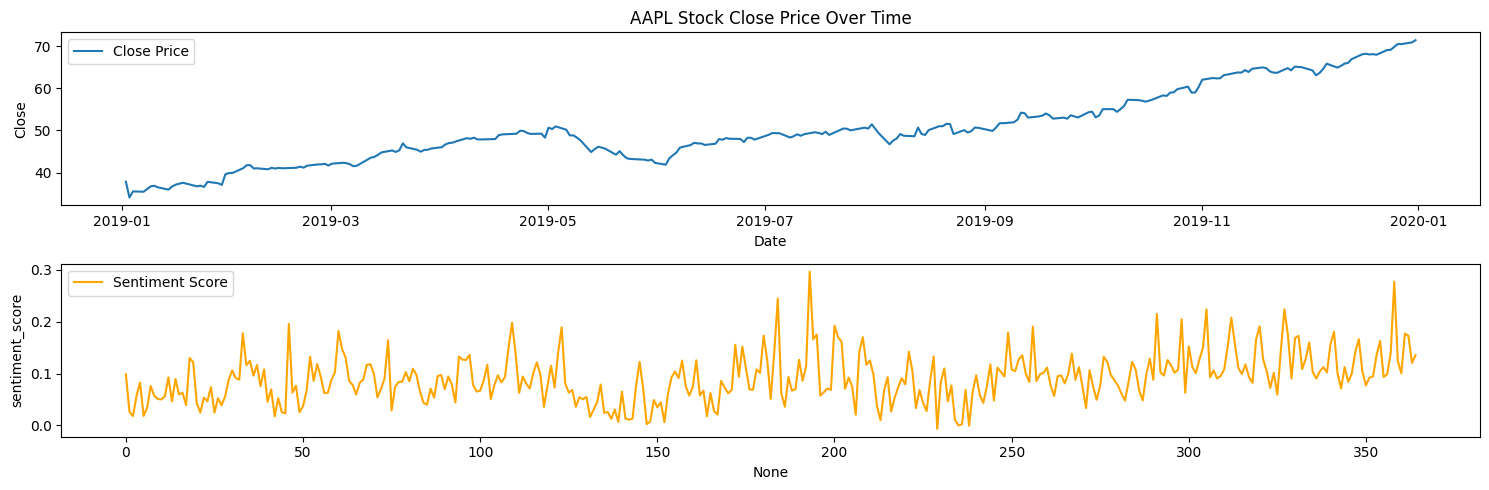

In [12]:
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
sns.lineplot(x=stock_data.index, y=stock_data["Close"], label="Close Price")
plt.title("AAPL Stock Close Price Over Time")
plt.subplot(2, 1, 2)
sns.lineplot(x=tweets_aggregated_score.index, y=tweets_aggregated_score["sentiment_score"], label="Sentiment Score", color="orange")
plt.tight_layout()
plt.show()

Read historical stock prices data for AAPL from Yahoo Finance for the year 2019. Then, filter the data to include only prices within the specified date range.

In [13]:
import pandas as pd  

# Reading stock data from CSV file into a DataFrame
stock_data = pd.read_csv("../../data/stock_prices/yfinance/AAPL_prices_2019-01-01_2020-01-01.csv")

# Converting 'Date' column to datetime objects with specified format
stock_data["Date"] = pd.to_datetime(stock_data["Date"], format="%Y-%m-%d %H:%M:%S%z")

# Converting start_date_string and end_date_string to datetime objects with UTC timezone
start_date = pd.to_datetime(start_date_string, utc=True)
end_date = pd.to_datetime(end_date_string, utc=True)

# Filtering stock_data DataFrame to include only rows within the specified date range
stock_data = stock_data.loc[(stock_data["Date"] >= start_date) & (stock_data["Date"] <= end_date)]

# Setting 'Date' column as index and sorting DataFrame by date
stock_data = stock_data.set_index("Date")
stock_data.sort_values(by="Date", inplace=True)

stock_data.head()


C:\Users\omare\AppData\Local\Temp\ipykernel_33688\896957461.py:7: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  stock_data["Date"] = pd.to_datetime(stock_data["Date"], format="%Y-%m-%d %H:%M:%S%z")


,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02 00:00:00-05:00,37.118910,38.067913,36.960742,37.845039,148158800
2019-01-03 00:00:00-05:00,34.504368,34.921355,34.029868,34.075401,365248800
2019-01-04 00:00:00-05:00,34.636170,35.599552,34.461229,35.530052,234428400
2019-01-07 00:00:00-05:00,35.635495,35.666650,34.964483,35.450966,219111200
2019-01-08 00:00:00-05:00,35.841590,36.383194,35.592358,36.126770,164101200


Merge historical stock price data with aggregated sentiment scores derived from StockTwits data based on the date. 


In [14]:
stock_data['Date'] = stock_data.index
stock_data.reset_index(drop=True, inplace=True)

# Converting 'Date' column to datetime objects and extracting date part
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True).dt.date

# Merging stock_data and tweets_aggregated_score DataFrames based on the 'Date' column, using left join
merged_data = pd.merge(stock_data, tweets_aggregated_score, on="Date", how="left")
merged_data.set_index("Date", inplace=True)
merged_data.head()


,Open,High,Low,Close,Volume,sentiment_score
Date,,,,,,
2019-01-02,37.118910,38.067913,36.960742,37.845039,148158800,0.026140
2019-01-03,34.504368,34.921355,34.029868,34.075401,365248800,0.017955
2019-01-04,34.636170,35.599552,34.461229,35.530052,234428400,0.056922
2019-01-07,35.635495,35.666650,34.964483,35.450966,219111200,0.034159
2019-01-08,35.841590,36.383194,35.592358,36.126770,164101200,0.076071


In [15]:
print(merged_data["sentiment_score"].min())
print(merged_data["sentiment_score"].max())


-0.0007141025641025633
0.17522633744855967


This code snippet computes Pearson correlation coefficient, the standard error, and the p-value. between sentiment scores with various time lags and stock closing prices.

In [21]:
from scipy.stats import pearsonr, t
import numpy as np

time_lags = [-9, -7, -5, -3, -1, 0, 1, 3, 5, 7, 9]

# Lists to store results
coefficients = []
standard_errors = []
p_values = []
t_scores = []

for lag in time_lags:
    lag_column_name = f'Sentiment_Lag_{lag}'
    merged_data[lag_column_name] = merged_data['sentiment_score'].shift(lag)
    correlation_data = merged_data[[lag_column_name]].join(merged_data['Close']).dropna()
    
    # Calculate Pearson correlation coefficient, p-value, and t-score
    correlation, p_value = pearsonr(correlation_data[lag_column_name], correlation_data['Close'])
    n = correlation_data.shape[0] 
    se = np.sqrt((1 - correlation**2) / (n - 2))
    t_score = correlation / se  # Calculate t-score
    
    coefficients.append(round(correlation, 4))
    standard_errors.append(round(se, 4))
    p_values.append(p_value)
    t_scores.append(t_score)

# Print results
print("Pearson Coefficients, Standard Errors, P-values, and t-scores for Sentiment Sources and AAPL Stock Price Changes:")
print("Sentiment Source\tTime Lag\tCoef.\tSE\tP-val\tt-score")
for i, lag in enumerate(time_lags):
    print(f"StockTwits\t\t{lag}\t\t{coefficients[i]}\t{standard_errors[i]}\t{p_values[i]}\t{t_scores[i]}")


Pearson Coefficients, Standard Errors, P-values, and t-scores for Sentiment Sources and AAPL Stock Price Changes:
Sentiment Source	Time Lag	Coef.	SE	P-val	t-score
StockTwits		-9		0.3481	0.0604	2.4950521222656737e-08	5.76444717259753
StockTwits		-7		0.362	0.0598	5.333244039467596e-09	6.053658582392909
StockTwits		-5		0.3892	0.0589	2.345776558221349e-10	6.61275350897446
StockTwits		-3		0.4009	0.0583	4.947760968557143e-11	6.878088841465065
StockTwits		-1		0.4299	0.0572	1.0372942387691276e-12	7.512799454496288
StockTwits		0		0.4723	0.0557	2.1034085531486506e-15	8.471341557809422
StockTwits		1		0.4684	0.056	4.2818405058901476e-15	8.366616453415517
StockTwits		3		0.4546	0.0567	4.2035654799966946e-14	8.02158356832627
StockTwits		5		0.4339	0.0576	9.25857957404877e-13	7.537692491247847
StockTwits		7		0.4252	0.0581	3.5326753363432917e-12	7.323751251699271
StockTwits		9		0.415	0.0586	1.5522546255687984e-11	7.081750182724141


Calculate the cross-correlation between sentiment scores from StockTwits data and daily closing prices of a stock. Then, plot the normalized cross-correlation against the lags, showing the relationship between sentiment from StockTwits and daily stock prices.


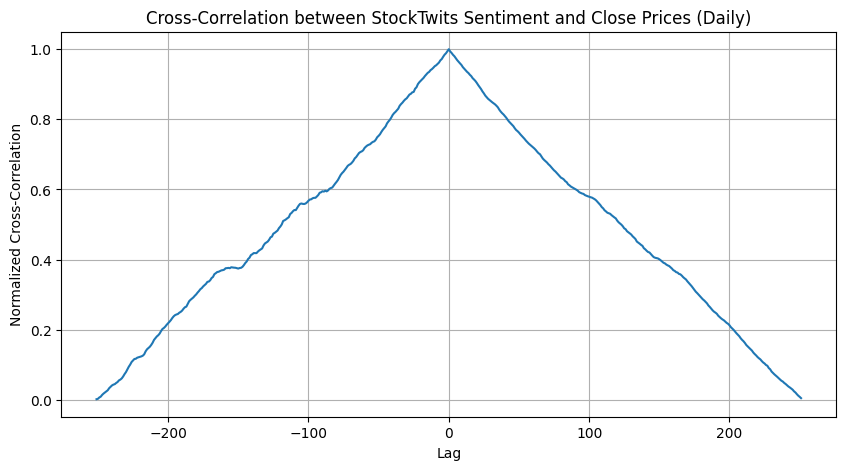

252


In [18]:
# Extracting sentiment scores and close prices as numpy arrays
sentiment_scores = merged_data['sentiment_score'].to_numpy()
close_prices = merged_data['Close'].to_numpy()

# Calculating cross-correlation between sentiment scores and close prices
cross_corr = np.correlate(sentiment_scores, close_prices, mode='full')

# Creating array of lag values corresponding to the cross-correlation
lags = np.arange(-len(sentiment_scores) + 1, len(sentiment_scores))

plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr / np.max(np.abs(cross_corr)))
plt.title('Cross-Correlation between StockTwits Sentiment and Close Prices (Daily)')
plt.xlabel('Lag')
plt.ylabel('Normalized Cross-Correlation')
plt.grid(True)
plt.show()
print(len(close_prices))
